## Tutorial 1： data load and compute slot score

Here we present our SLOT score analysis on the stage IV oocyte protein dataset.This tutorial demonstrates how to identify spatial polarity proteins at subcellular resolution. The processed data are available at [XenoSTAR](http://xenostar.ncpsb.org.cn).

## Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [2]:
import SLOT
from SLOT import SLOT_model  

In [3]:
adata = sc.read_h5ad('data/S4_Protein.h5ad')
slot_adata = SLOT_model(adata)

### Construct the Probability Matrix
Next, construct the spatial probability matrix, which will be used in the SLOT score calculation. You can set the step size to define the granularity of the spatial binning:

In [4]:
# Construct the probability matrix with a specified step size
slot_adata.construct_prob_matrix(step=5)

Added spatial probability matrix to adata.varm


step=5: This parameter defines the step size for reducing the spatial resolution. Adjust the step size according to your data’s spatial resolution requirements. 
### Compute the SLOT Scores 
Finally, compute the SLOT scores. You can choose the distribution against which the spatial distribution is compared (default is uniform distribution), and whether to scale the scores (using expression level).

In [5]:
# Compute the SLOT scores
slot_adata.slot_metric(dist="uni", scale=True)

Added SLOT score to adata.var


In [6]:
slot_adata.adata.var

,slot_score,slot_score_scale
cyp2c8.1.L,0.479651,0.111138
clptm1l.S,0.226581,0.187775
supt16h.L,0.342564,0.170132
acer3.S,0.444209,0.102009
aldh3b2.L,0.120584,0.206828
...,...,...
immt.S,0.222261,0.336445
ranbp1.S,0.128084,0.283802
baz1a.L,0.339089,0.307904
gmps.L,0.081468,0.165108


After running the above steps, the SLOT scores and associated statistical data are stored within the AnnData object:

•adata.var["slot_score"]: Contains the computed SLOT scores for each protein/mRNA.

•adata.var["slot_score_scale"]: Contains the scaled SLOT scores (if scale=True was used).

### plot

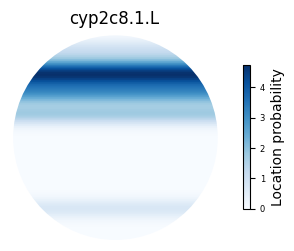

In [7]:
protein_name = 'cyp2c8.1.L'
SLOT.plot.plot_2d(protein_name,adata,save_dir=None,dpi=300)

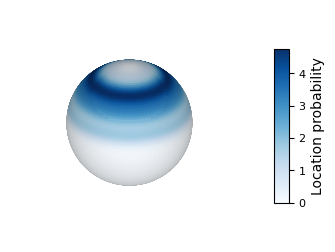

In [8]:
SLOT.plot.plot_3d(protein_name,adata,save_dir=None,dpi=300,elev=30,azim=225)